In [2]:
##The % sign indictes it is a magic command. In this case it shows visualization inline##
%matplotlib inline 

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot') ##This uses ggplot style.

In [4]:
##read in the csv file using pandas.

pd.read_csv('runners_check3.csv')

,name,country,age,sex,runner_Id,hours,minutes,seconds,place
0,Lelisa Desisa,ETH,28,M,3,2,5,59,1
1,Shura Kitata,ETH,22,M,2,2,6,1,2
2,Geoffrey Kamworor,KEN,25,M,1,2,6,26,3
3,Tamirat Tola,ETH,27,M,4,2,8,30,4
4,Daniel Wanjiru,KEN,26,M,5,2,10,21,5
5,Jared Ward,MAPLETON,30,M,15,2,12,24,6
6,Scott Fauble,FLAGSTAFF,26,M,18,2,12,28,7
7,Festus Talam,KEN,24,M,6,2,12,40,8
8,Shadrack Biwott,FOLSOM,33,M,11,2,12,52,9
9,Chris Derrick,PORTLAND,28,M,19,2,13,8,10


In [5]:
##remove the duplicate records until the bug in the code is fixed. 

with open('runners_check3.csv','r') as in_file, open('runners_nodup.csv','w') as out_file:
    seen = set() # set for fast O(1) amortized lookup
    for line in in_file:
        if line in seen: continue # skip duplicate

        seen.add(line)
        out_file.write(line)

In [6]:
runners=pd.read_csv('runners_nodup.csv')

In [ ]:
#reset the index to runner_Id -- no need really.

#runners.reset_index()
#runners=runners.set_index('runner_Id')

In [7]:
##replace all country codes greater than 3 to USA. 

unique_values = runners['country'].unique()
state_list = []
for i in range(len(unique_values)):
    if len(unique_values[i]) > 3:
        state_list.append(unique_values[i])
#state_list

runners['country'] = runners['country'].replace(state_list, 'USA')

runners['country'] = runners['country'].replace('LEE','USA')

runners['country'] = runners['country'].replace('RYE','USA')


In [8]:
##How many countries in the top 2600 finishers?
runners.country.unique()
runners['country'].nunique()
runners['country'].value_counts()

USA    1154
ITA     152
GBR     149
FRA     132
ESP      92
CAN      87
AUS      60
BRA      51
GER      50
MEX      47
SWE      44
NOR      40
JPN      38
SUI      38
NED      37
CHN      34
IRL      30
DEN      26
POL      24
RUS      24
ARG      22
BEL      19
COL      19
CHI      16
ETH      16
HKG      16
AUT      14
NZL      11
CZE      10
UKR      10
       ... 
IND       4
SLO       4
MAS       3
FIN       3
DOM       3
ISR       2
BLR       2
EST       2
PAN       2
PUR       2
LUX       2
MAR       2
TUR       2
ISL       2
URU       2
SVK       2
LTU       1
GRE       1
SMR       1
LAT       1
BOL       1
BOT       1
BDI       1
JAM       1
UGA       1
MGL       1
BAH       1
CRO       1
NEP       1
BUL       1
Name: country, Length: 71, dtype: int64

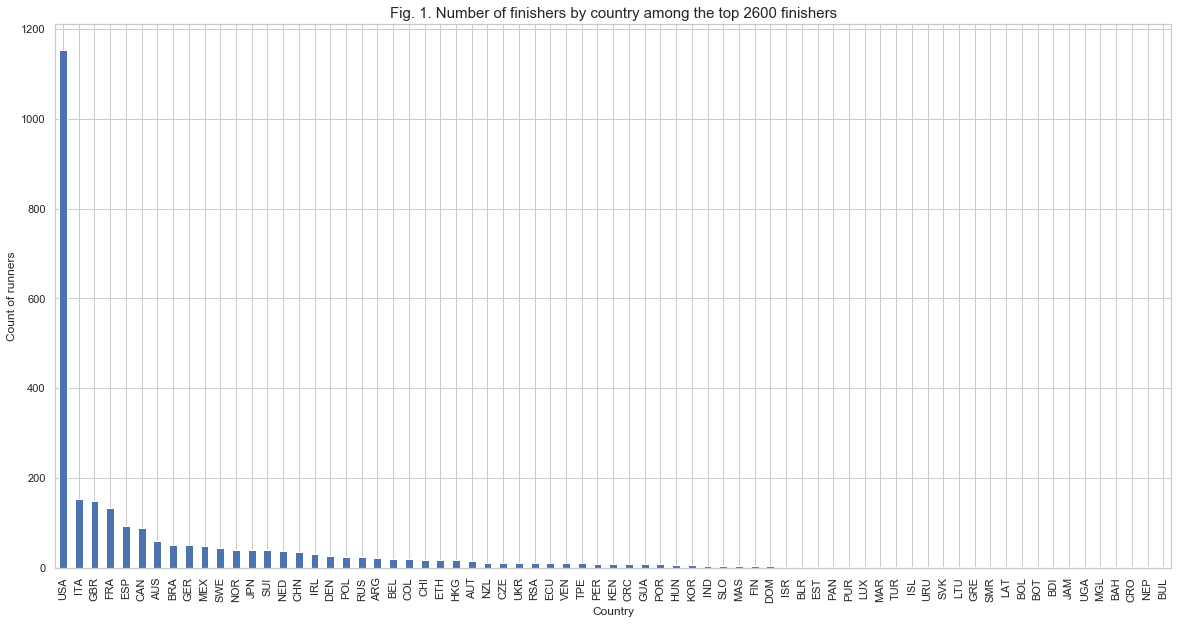

In [13]:
##create a bar plot of the number of runners by country. 

plt.figure(figsize=(20,10))

bar_df=runners['country'].value_counts()
bar_df.plot.bar(color='b')

plt.title('Fig. 1. Number of finishers by country among the top 2600 finishers', fontsize=15)
plt.ylabel('Count of runners', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

#axs[0].bar(names, values)

#runners['country'].value_counts(sort=False) ###same code as above but with sort option.

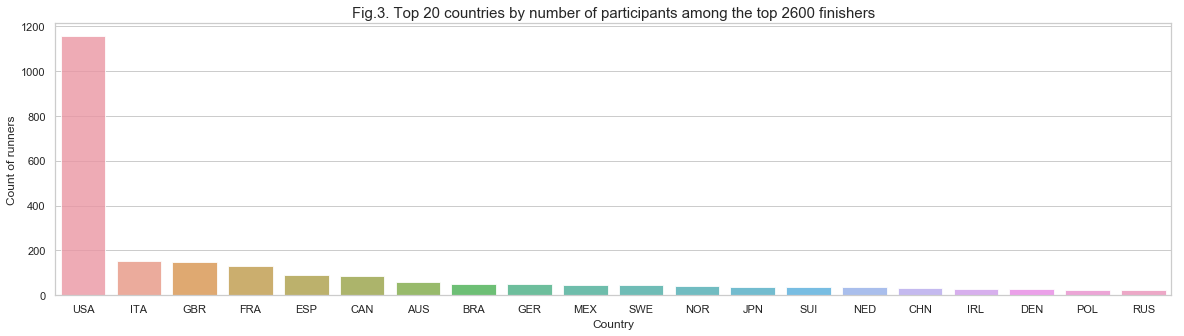

In [10]:
##Top 20 countries with most participants in top 2600

runner_count  = runners['country'].value_counts()
runner_count = runner_count[:20,]

sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
sns.barplot(runner_count.index, runner_count.values, alpha=0.8)
plt.title('Fig.3. Top 20 countries by number of participants among the top 2600 finishers', fontsize=15)
plt.ylabel('Count of runners', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

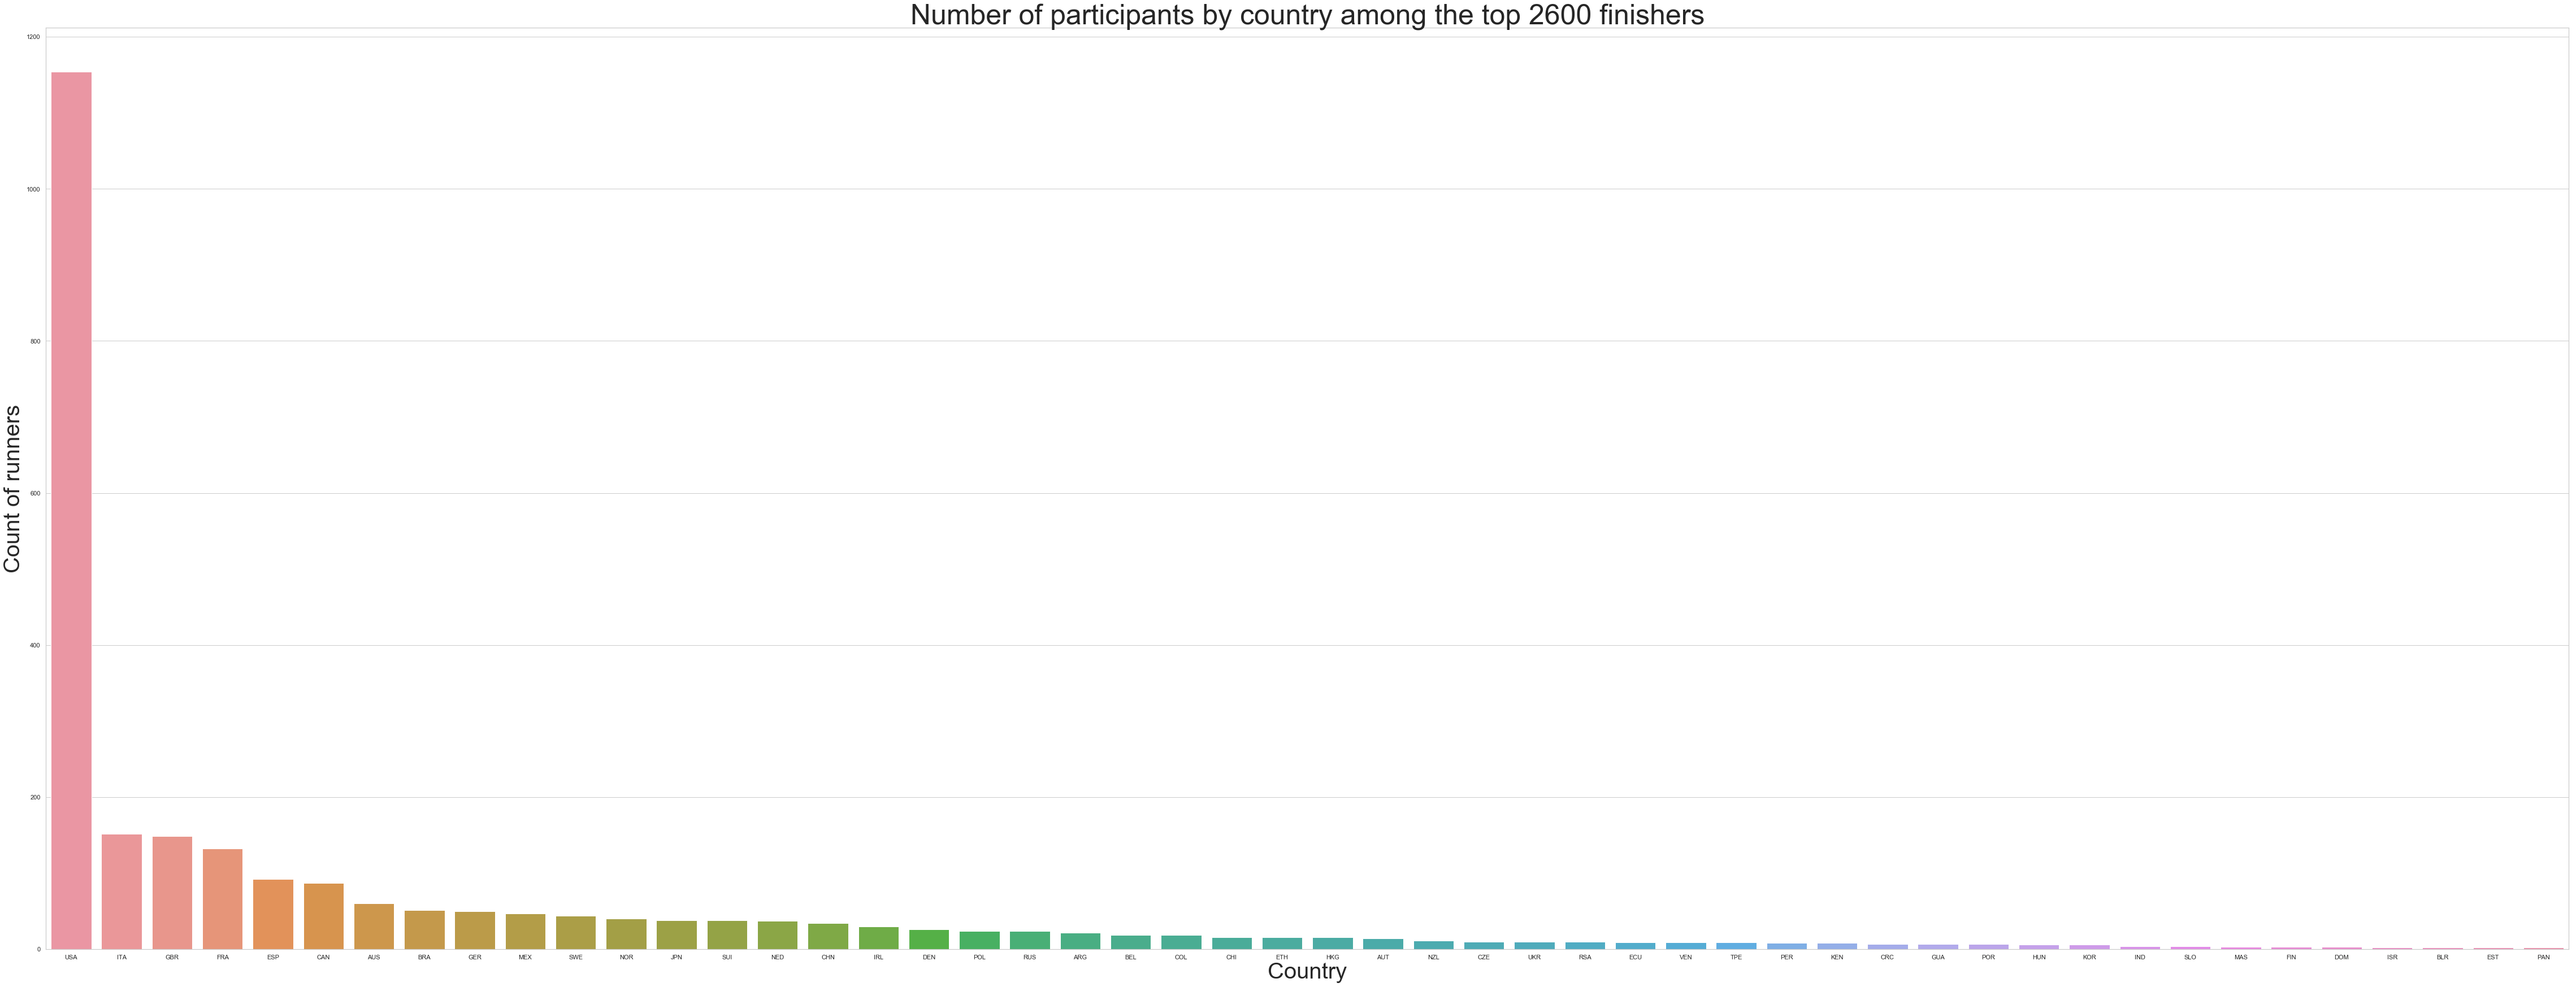

In [11]:
runner_count  = runners['country'].value_counts()
runner_count = runner_count[:50,]

sns.set(style="whitegrid")
plt.figure(figsize=(80,30))
sns.barplot(runner_count.index, runner_count.values, alpha=1.0)
plt.title('Number of participants by country among the top 2600 finishers', fontsize=50)
plt.ylabel('Count of runners', fontsize=40)
plt.xlabel('Country', fontsize=40)
plt.show()

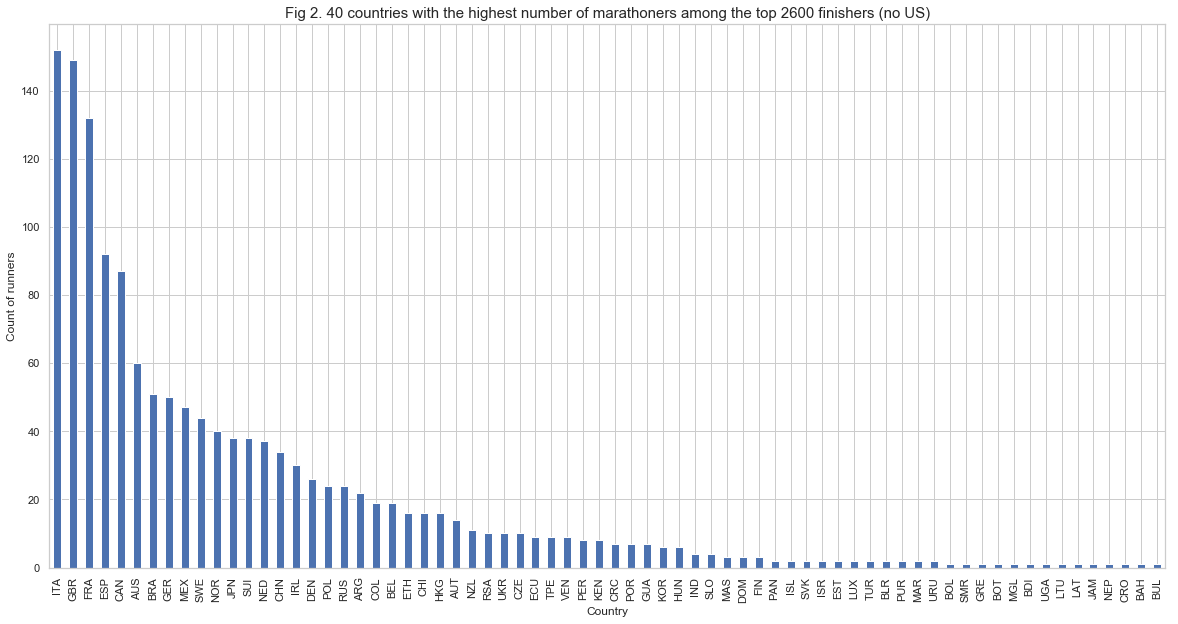

In [12]:
## Checking frequencies without the US:

us = ["USA"]

~runners.country.isin(us)  ##returns a boolean list. 
runnous=runners[(~runners.country.isin(us))] ##filters the dataset by just the east african countries and returns a subset of the dataset.


plt.figure(figsize=(20,10))
barnous=runnous['country'].value_counts()

barnous.plot.bar(color='b')
plt.title('Fig 2. 40 countries with the highest number of marathoners among the top 2600 finishers (no US)', fontsize=15)
plt.ylabel('Count of runners', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

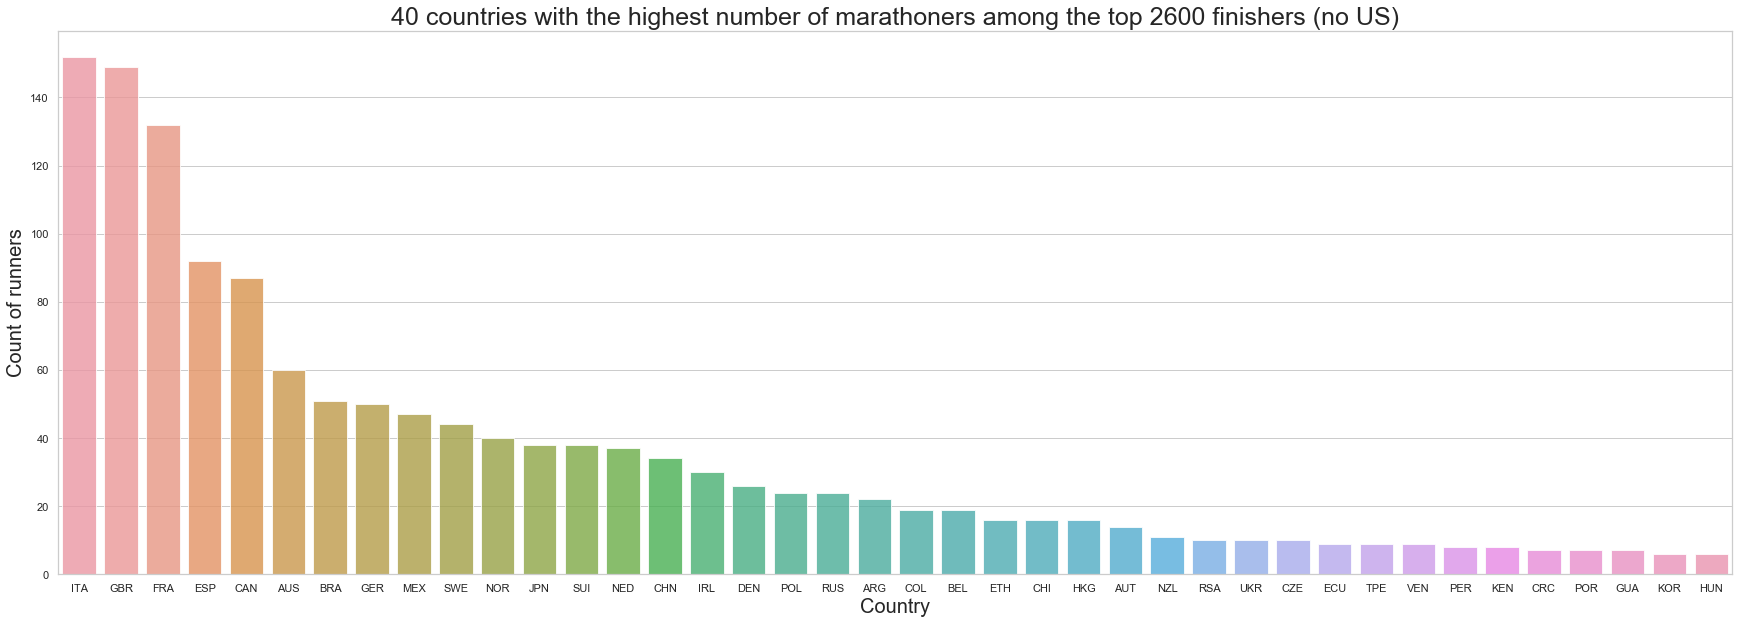

In [14]:
##Checking frequencies without the US -- Seaborn plot.
us = ["USA"]

~runners.country.isin(us)  ##returns a boolean list. 
runnous=runners[(~runners.country.isin(us))] ##filters the dataset without US and returns a subset of the dataset.

sns.set(style="whitegrid")
runner_count  = runnous['country'].value_counts()
runner_count = runner_count[:40,]
plt.figure(figsize=(30,10))
sns.barplot(runner_count.index, runner_count.values, alpha=0.8)
plt.title('40 countries with the highest number of marathoners among the top 2600 finishers (no US)', fontsize=25)
plt.ylabel('Count of runners', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.show()

In [15]:
##filtering the dataset by specific values in a column, in this case to filter it for just the E.African countries.

eastafrica = ["ETH" ,"KEN", "UGA"]

runners.country.isin(eastafrica)  ##returns a boolean list. 
runeaf= runners[(runners.country.isin(eastafrica))] ##filters the dataset by just the east african countries and returns a subset of the dataset.

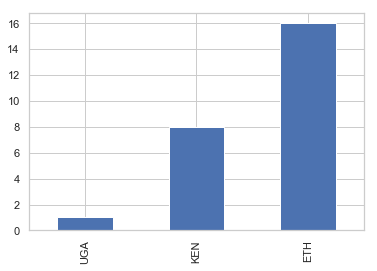

In [16]:
bar_eaf= runeaf['country'].value_counts(sort=False)
bar_eaf.plot.bar(color='b')

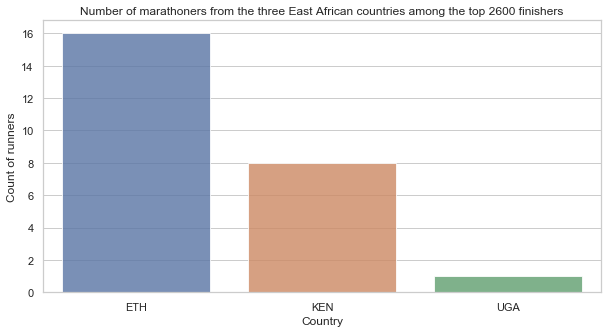

In [17]:
##Checking frequencies for the 3 E African countries -- Seaborn plot.
runner_count  = runeaf['country'].value_counts()
#runner_count = runner_count[:40,]
plt.figure(figsize=(10,5))
sns.barplot(runner_count.index, runner_count.values, alpha=0.8)
plt.title('Number of marathoners from the three East African countries among the top 2600 finishers', fontsize=12)
plt.ylabel('Count of runners', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

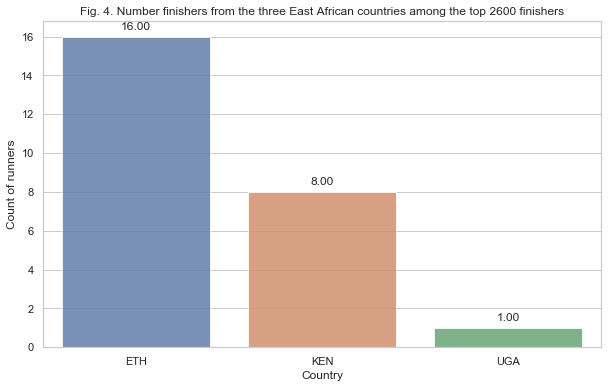

In [18]:
##Checking frequencies for the 3 E African countries -- Seaborn plot (includes value labels)
runner_count  = runeaf['country'].value_counts()
#runner_count = runner_count[:40,]
plt.figure(figsize=(10,6))

splot = sns.barplot(runner_count.index, runner_count.values, alpha=0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Fig. 4. Number finishers from the three East African countries among the top 2600 finishers', fontsize=12)
plt.ylabel('Count of runners', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [ ]:
runners

In [19]:
#recode the country variable to a dummy var for E Africa
def eastaf(country):
    if country == "ETH" or country=='KEN' or country=='UGA':
        return 1
    else:
        return 0

runners['east_africa'] = runners['country'].apply(eastaf).astype('category')

runners['east_africa'].value_counts(sort=False)

##Attach labels to East Africa. 
labels={1:'EAF', 0:'Oth'}
runners['east_africa']=runners.east_africa.apply(lambda x:labels[x])
runners.head()


,name,country,age,sex,runner_Id,hours,minutes,seconds,place,east_africa
0,Lelisa Desisa,ETH,28,M,3,2,5,59,1,EAF
1,Shura Kitata,ETH,22,M,2,2,6,1,2,EAF
2,Geoffrey Kamworor,KEN,25,M,1,2,6,26,3,EAF
3,Tamirat Tola,ETH,27,M,4,2,8,30,4,EAF
4,Daniel Wanjiru,KEN,26,M,5,2,10,21,5,EAF


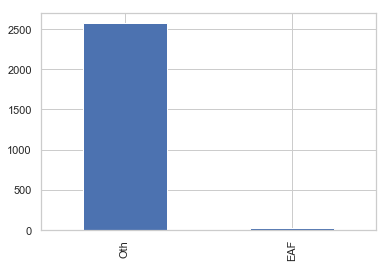

In [20]:
##create a bar plot of the runners from East Africa.

bar_ef= runners['east_africa'].value_counts(sort=False)
bar_ef.plot.bar(color='b')

In [21]:
#recode the country variable to a categorical var for each E African country
def eastafc(country):
    if country == "ETH":
        return 1
    elif country=='KEN':
        return 2
    elif country=='UGA':
        return 3
    else:
        return 0
    
runners['eastaf_country'] = runners['country'].apply(eastafc)
runners['eastaf_country'].value_counts(sort=False)

0    2576
2       8
1      16
3       1
Name: eastaf_country, dtype: int64

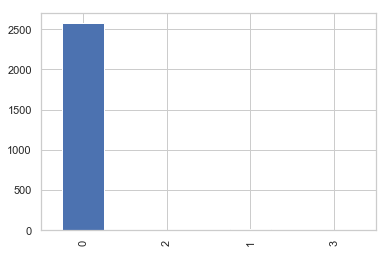

In [22]:
##create a bar plot of runners by each E.African country:

bar_eaf= runners['eastaf_country'].value_counts(sort=False)
bar_eaf.plot.bar(color='b')


In [23]:
##create a variable for each E.African country to get counts.

runners['eth'] = np.where(runners['country']=="ETH", 1, 0)
runners['ken'] = np.where(runners['country']=="KEN", 1, 0)
runners['uga'] = np.where(runners['country']=="UGA", 1, 0)


In [24]:
#recode the sex variable to a 0/1 dummy var
def sexdum(sex):
    if sex == "M":
        return 0
    else:
        return 1

runners['sex_dummy'] = runners['sex'].apply(sexdum)

runners['sex_dummy'].value_counts(sort=False)

0    2308
1     293
Name: sex_dummy, dtype: int64

In [25]:
#recode to get a separate dummy for males and females -- may be needed for a stacked bar graph.
runners['male'] = np.where(runners['sex']=="M", 1, 0)
runners['female'] = np.where(runners['sex']=="F", 1, 0)

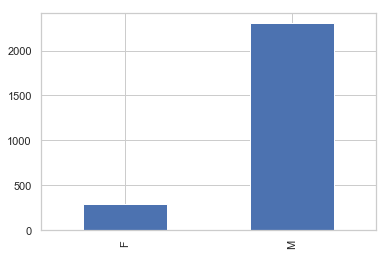

In [26]:
##create a graph for the sex dummy variable

bar_gen=runners['sex'].value_counts(sort=False)
bar_gen.plot.bar(color='b')

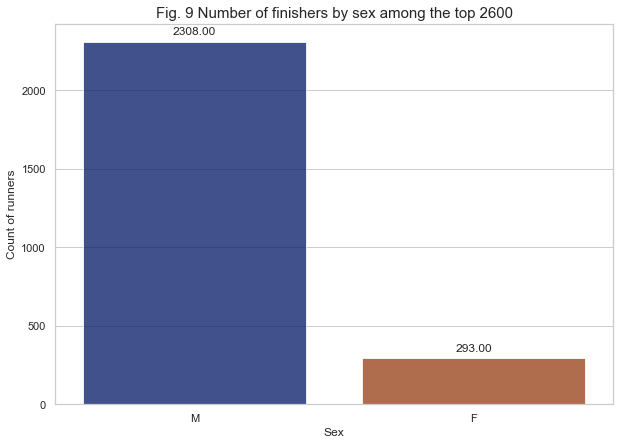

In [83]:
##Checking frequencies for runners by men and women -- Seaborn plot (includes value labels)

girl_count  = runners['sex'].value_counts()

#runner_count = runner_count[:40,]

sns.set(style="whitegrid")

plt.figure(figsize=(10,7))

splot = sns.barplot(girl_count.index, girl_count.values, palette ="dark", alpha=0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Fig. 9 Number of finishers by sex among the top 2600', fontsize=15)
plt.ylabel('Count of runners', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.show()

In [ ]:
len(runners.country)

In [ ]:
runners.loc[runners.country=="ETH",:]

In [ ]:
runners.loc[runners.country=="KEN",:]

In [ ]:
runners.loc[runners.country=="UGA",:]

In [ ]:
runners.loc[runners.country=="USA",:]

In [ ]:
sexcross = pd.crosstab(runners.country, runners.sex, rownames=['country'], colnames=['sex'], normalize=True, 
                       margins=True, margins_name="Total")
sexcross.head()

In [28]:
##set up code for a stacked bar graph by sex -- proportions

runners[runners['country']=='USA']['male'].mean() ##checking if code works
runners[runners['country']=='USA']['female'].mean() ##also checking if code works

##code for all countries
df2=runners.groupby(['country'])[['male']].agg(np.mean)
df3=runners.groupby(['country'])[['female']].agg(np.mean)

df4= pd.merge(df2, df3, how = 'outer', on = 'country')
df5=df4.sort_values('female',ascending = False)
df5

dfsex = df5.iloc[0:20]
dfsex.head()
#list(df5.index)

,male,female
country,,
LTU,0.0000,1.0000
BLR,0.0000,1.0000
PUR,0.5000,0.5000
ETH,0.6875,0.3125
KEN,0.7500,0.2500


In [29]:
dfsex["total_sex"] = dfsex.male + dfsex.female
dfsex.head()

C:\Users\aparn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,male,female,total_sex
country,,,
LTU,0.0000,1.0000,1.0
BLR,0.0000,1.0000,1.0
PUR,0.5000,0.5000,1.0
ETH,0.6875,0.3125,1.0
KEN,0.7500,0.2500,1.0


C:\Users\aparn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


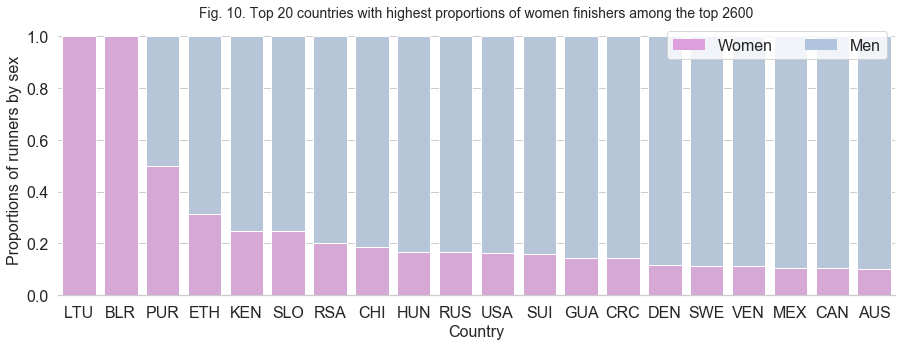

In [30]:
##create a stacked bar graph for sex by country

#first create a total column
dfsex["total_sex"] = dfsex.male + dfsex.female
#runners

#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 5)})

#Plot 1 - background - "total" (top) series
#sns.barplot(x = dfsex.index, y = dfsex.total_sex, color = "red")
sns.barplot(x = dfsex.index, y = dfsex.total_sex, color = "lightsteelblue")


#Plot 2 - overlay - "bottom" series
#bottom_plot = sns.barplot(x = dfsex.index, y = dfsex.female, color = "#0000A3")
bottom_plot = sns.barplot(x = dfsex.index, y = dfsex.female, color = "plum")


#topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
topbar = plt.Rectangle((0,0),1,1,fc="lightsteelblue", edgecolor = 'none')

#bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='plum', edgecolor = 'none')

l = plt.legend([bottombar, topbar], ['Women', 'Men'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(True)


##code to make it look nicer
sns.despine(left=True)

bottom_plot.set_ylabel("Proportions of runners by sex", fontsize=12)

bottom_plot.set_xlabel("Country", fontsize=12)

bottom_plot.set_title('Fig. 10. Top 20 countries with highest proportions of women finishers among the top 2600', fontsize=14)



#Set fonts to consistent 16pt size

for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +

             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):

    item.set_fontsize(16)

In [31]:
##set up code for a stacked bar graph by sex -- counts.

runners[runners['country']=='USA']['male'].sum() ##checking if code works. Sum of 1s will automatically give counts
runners[runners['country']=='USA']['female'].sum() ##also checking if code works

##code for all countries
#df2=runners.groupby(['country'])[['male']].agg(np.sum) ##this code can also be used but going with below for now.

df2=runners.groupby(['country'])[['male']].sum()
df2
df3=runners.groupby(['country'])[['female']].sum()
df3
df4= pd.merge(df2, df3, how = 'outer', on = 'country')
df5=df4.sort_values('female',ascending = False)
df5

dfsex = df5.iloc[0:20]
dfsex.head
list(df5.index)

dfsex["total_sex"] = dfsex.male + dfsex.female
dfsex.head()

C:\Users\aparn\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,male,female,total_sex
country,,,
USA,966,188,1154
GBR,139,10,149
ITA,143,9,152
CAN,78,9,87
AUS,54,6,60


C:\Users\aparn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


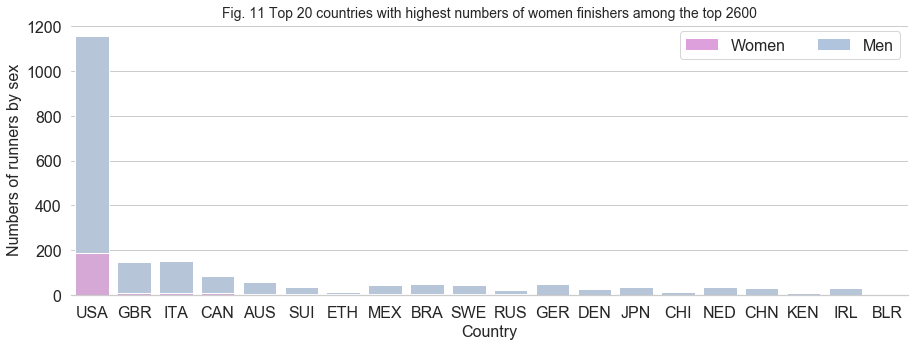

In [32]:
##create a stacked bar graph for sex by country

#first create a total column
dfsex["total_sex"] = dfsex.male + dfsex.female
#runners

#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 5)})

#Plot 1 - background - "total" (top) series
#sns.barplot(x = dfsex.index, y = dfsex.total_sex, color = "red")
sns.barplot(x = dfsex.index, y = dfsex.total_sex, color = "lightsteelblue")


#Plot 2 - overlay - "bottom" series
#bottom_plot = sns.barplot(x = dfsex.index, y = dfsex.female, color = "#0000A3")
bottom_plot = sns.barplot(x = dfsex.index, y = dfsex.female, color = "plum")


#topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
topbar = plt.Rectangle((0,0),1,1,fc="lightsteelblue", edgecolor = 'none')

#bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='plum', edgecolor = 'none')

l = plt.legend([bottombar, topbar], ['Women', 'Men'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(True)


##code to make it look nicer
sns.despine(left=True)

bottom_plot.set_ylabel("Numbers of runners by sex", fontsize=12)

bottom_plot.set_xlabel("Country", fontsize=12)

bottom_plot.set_title('Fig. 11 Top 20 countries with highest numbers of women finishers among the top 2600', fontsize=14)



#Set fonts to consistent 16pt size

for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +

             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):

    item.set_fontsize(16)

In [33]:
##set up code for a stacked bar graph by sex -- counts, but this time without the US.

runners[runners['country']=='USA']['male'].sum() ##checking if code works. Sum of 1s will automatically give counts
runners[runners['country']=='USA']['female'].sum() ##also checking if code works

##code for all countries
#df2=runners.groupby(['country'])[['male']].agg(np.sum) ##this code can also be used but going with below for now.

df2=runners.groupby(['country'])[['male']].sum()
df2
df3=runners.groupby(['country'])[['female']].sum()
df3
df4= pd.merge(df2, df3, how = 'outer', on = 'country')
df5=df4.sort_values('female',ascending = False)
df5

dfsex = df5.iloc[1:20]
dfsex.head
list(df5.index)

dfsex["total_sex"] = dfsex.male + dfsex.female
dfsex

C:\Users\aparn\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,male,female,total_sex
country,,,
GBR,139,10,149
ITA,143,9,152
CAN,78,9,87
AUS,54,6,60
SUI,32,6,38
ETH,11,5,16
MEX,42,5,47
BRA,46,5,51
SWE,39,5,44


C:\Users\aparn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


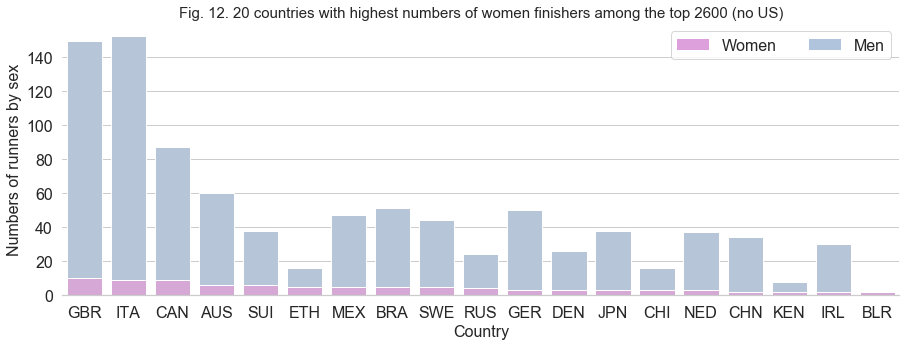

In [34]:
##create a stacked bar graph for sex by country

#first create a total column
dfsex["total_sex"] = dfsex.male + dfsex.female
#runners

#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 5)})

#Plot 1 - background - "total" (top) series
#sns.barplot(x = dfsex.index, y = dfsex.total_sex, color = "red")
sns.barplot(x = dfsex.index, y = dfsex.total_sex, color = "lightsteelblue")


#Plot 2 - overlay - "bottom" series
#bottom_plot = sns.barplot(x = dfsex.index, y = dfsex.female, color = "#0000A3")
bottom_plot = sns.barplot(x = dfsex.index, y = dfsex.female, color = "plum")


#topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
topbar = plt.Rectangle((0,0),1,1,fc="lightsteelblue", edgecolor = 'none')

#bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='plum', edgecolor = 'none')

l = plt.legend([bottombar, topbar], ['Women', 'Men'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(True)


##code to make it look nicer
sns.despine(left=True)

bottom_plot.set_ylabel("Numbers of runners by sex", fontsize=12)

bottom_plot.set_xlabel("Country", fontsize=12)

bottom_plot.set_title('Fig. 12. 20 countries with highest numbers of women finishers among the top 2600 (no US)',fontsize=15)

#Set fonts to consistent 16pt size

for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +

             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):

    item.set_fontsize(16)

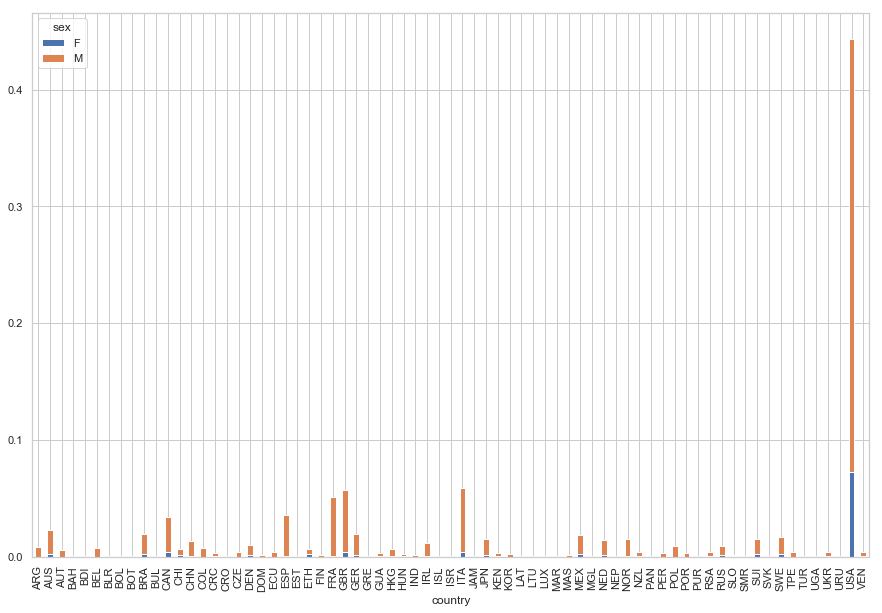

In [35]:
## women runners by country:

sexcross = pd.crosstab(runners.country, runners.sex, rownames=['country'], colnames=['sex'], normalize=True)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print("Current size: ", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#plt.figure(figsize=(30,60))

sexcross.plot.bar(stacked=True)
plt.legend(title='sex')

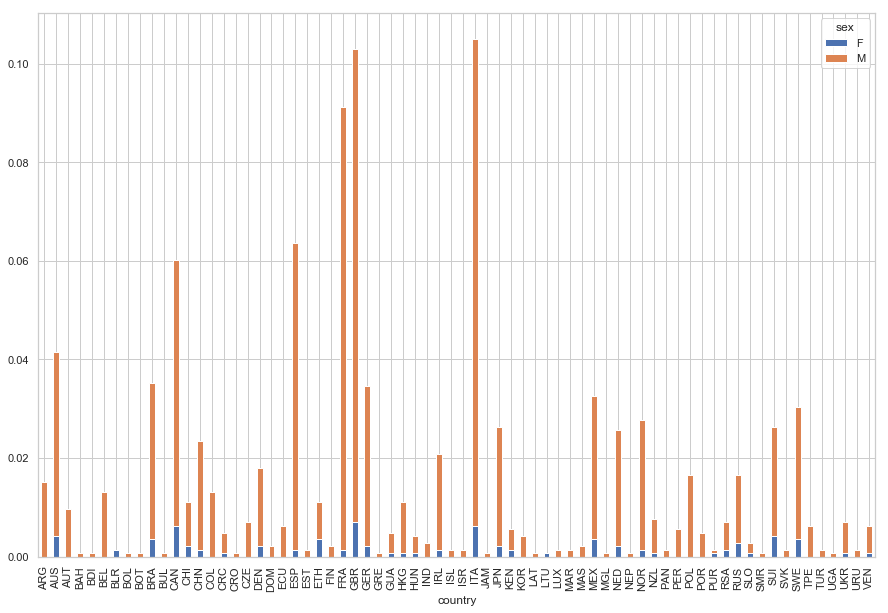

In [36]:
## women runners by country without US:

us = ["USA"]

~runners.country.isin(us)  ##returns a boolean list. 
runnous=runners[(~runners.country.isin(us))] ##filters the dataset returns a subset of the dataset.


sexcross = pd.crosstab(runnous.country, runnous.sex, rownames=['country'], colnames=['sex'], normalize=True)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print("Current size: ", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#plt.figure(figsize=(30,60))

sexcross.plot.bar(stacked=True)
plt.legend(title='sex')

In [ ]:
##The code below is supposed to generate a heat map but it didn't work. 

#sns.heatmap(pd.crosstab([runners.country], [runners.sex]),
#            cmap="YlGnBu", annot=True, cbar=False)

In [37]:
#create a dummy variable for E Africa
def eadum(country):
    if country == "ETH" or country=='KEN' or country=='UGA':
        return 1
    else:
        return 0

runners['eastafdum'] = runners['country'].apply(eadum)

runners['eastafdum'].value_counts(sort=False)

0    2576
1      25
Name: eastafdum, dtype: int64

In [38]:
runners.agg(['min', 'max', 'mean', 'median', 'std'])['age']

min       18.000000
max       63.000000
mean      37.348712
median    37.000000
std        8.159014
Name: age, dtype: float64

In [39]:
##create a dataframe of the first top 50 and top 25 finishers

type(runners['place'])

runners.place = pd.to_numeric(runners.place, errors='coerce')

runner50=runners[runners['place']<51] ##top 50 finishers

runner25=runners[runners['place']<26] ##top 25 finishers

runner10=runners[runners['place']<11] ##top 10 finishers

runner5=runners[runners['place']<6] ##top 5 finishers


In [ ]:
runner50.head()

In [ ]:
runner25.head()

In [41]:
runner50['country'].value_counts(sort=False)

BEL     1
ETH    10
UGA     1
PUR     1
GER     1
USA    22
KEN     5
MEX     1
ITA     1
GBR     5
GUA     1
Name: country, dtype: int64

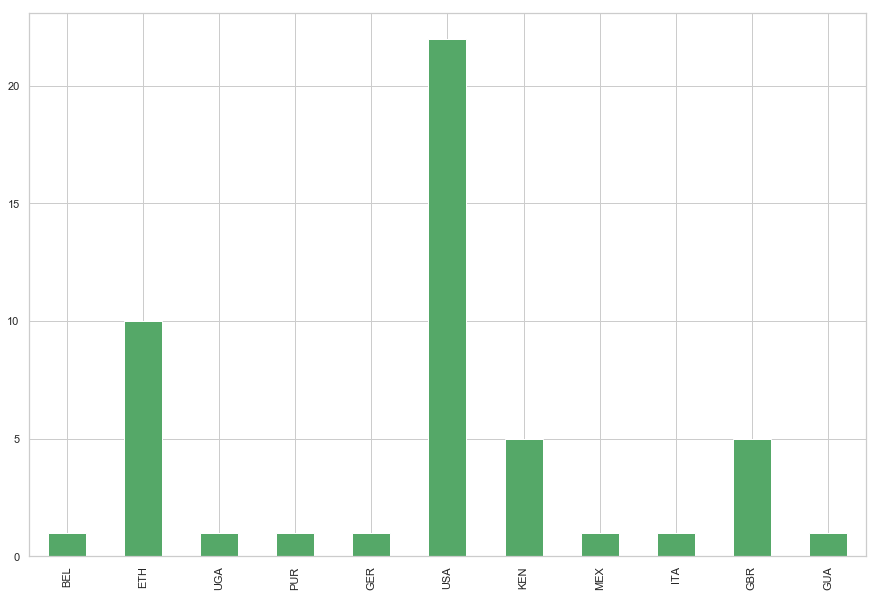

In [42]:
bar50=runner50['country'].value_counts(sort=False)
bar50.plot.bar(color='g')

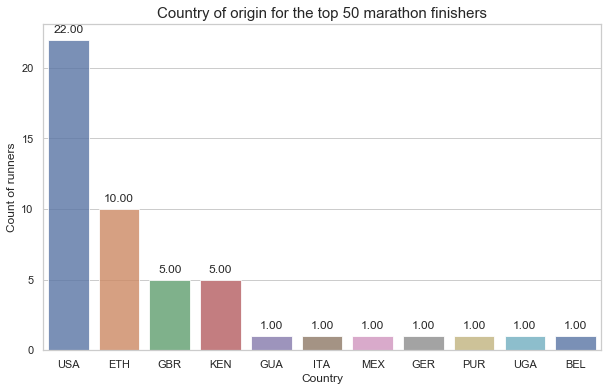

In [40]:
##Checking frequencies for top 50 runners by country  -- Seaborn plot (includes value labels)

top50  = runner50['country'].value_counts()

#runner_count = runner_count[:40,]

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

splot = sns.barplot(top50.index, top50.values, palette ="deep", alpha=0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Country of origin for the top 50 marathon finishers', fontsize=15)
plt.ylabel('Count of runners', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [ ]:
runner25['country'].value_counts(sort=False)

In [ ]:
bar25=runner25['country'].value_counts(sort=False)
bar25.plot.bar(color='r')

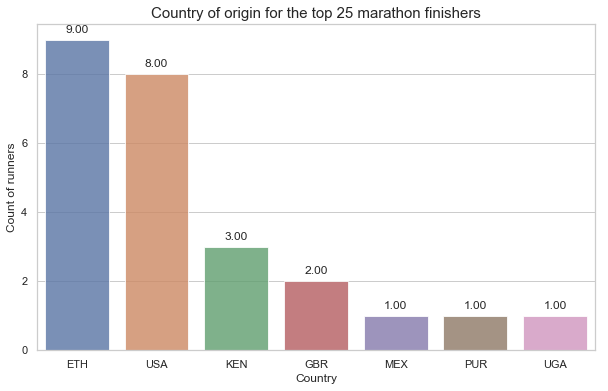

In [43]:
##Checking frequencies for top 25 runners by country  -- Seaborn plot (includes value labels)

top25  = runner25['country'].value_counts()

#runner_count = runner_count[:40,]

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

splot = sns.barplot(top25.index, top25.values, palette ="deep", alpha=0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Country of origin for the top 25 marathon finishers', fontsize=15)
plt.ylabel('Count of runners', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [44]:
runner10['country'].value_counts(sort=False)

USA    4
KEN    3
ETH    3
Name: country, dtype: int64

In [ ]:
bar10=runner10['country'].value_counts(sort=False)
bar10.plot.bar(color='b')

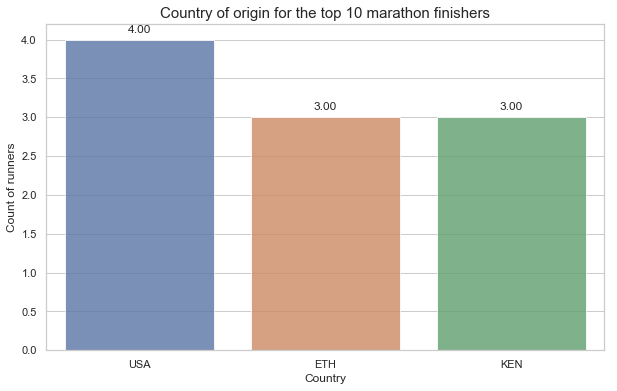

In [45]:
##Checking frequencies for top 25 runners by country  -- Seaborn plot (includes value labels)

top10  = runner10['country'].value_counts()

#runner_count = runner_count[:40,]

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

splot = sns.barplot(top10.index, top10.values, palette ="deep", alpha=0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Country of origin for the top 10 marathon finishers', fontsize=15)
plt.ylabel('Count of runners', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [ ]:
runner5['country'].value_counts(sort=False)

In [ ]:
bar5=runner5['country'].value_counts(sort=False)
bar5.plot.bar(color='b')

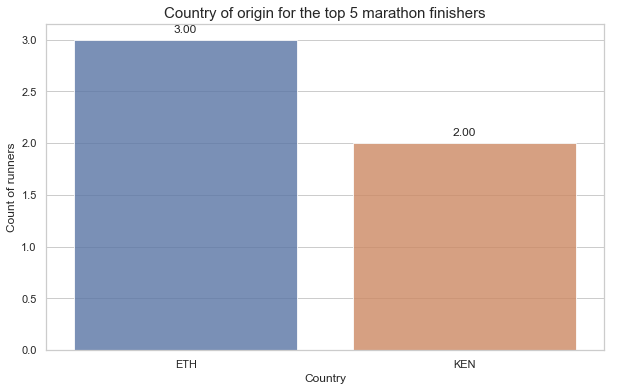

In [46]:
##Checking frequencies for top 25 runners by country  -- Seaborn plot (includes value labels)

top5  = runner5['country'].value_counts()

#runner_count = runner_count[:40,]

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

splot = sns.barplot(top5.index, top5.values, palette ="deep", alpha=0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Country of origin for the top 5 marathon finishers', fontsize=15)
plt.ylabel('Count of runners', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [47]:
##steps t0obtain proportions of east african runners among the top 50, 25, 10 and 5 finishers

toteastaf = runners['eastafdum'].sum()
toteastaf

tot50eastaf = runner50['eastafdum'].sum()
tot25eastaf = runner25['eastafdum'].sum()
tot10eastaf = runner10['eastafdum'].sum()
tot5eastaf  =  runner5['eastafdum'].sum()

#Total = df['MyColumn'].sum()

In [ ]:
toteastaf

In [ ]:
tot50eastaf

In [ ]:
tot25eastaf

In [ ]:
tot10eastaf

In [ ]:
tot5eastaf

In [48]:
#Proportion of east african runners in top 50 out of 50 and of all east African runners:
prop50 = (tot50eastaf/50)*100
prop50eaf = (tot50eastaf/toteastaf)*100

##proportion east african runners in top 25
prop25= (tot25eastaf/25)*100
prop25eaf=(tot25eastaf/toteastaf)*100


##proportion east african runners in top 10
prop10= (tot10eastaf/10)*100
prop10eaf=(tot10eastaf/toteastaf)*100

##proportion east african runners in top 5
prop5= (tot5eastaf/5)*100
prop5eaf=(tot5eastaf/toteastaf)*100

In [ ]:
prop50
prop50eaf

In [ ]:
#prop25
prop25eaf

In [ ]:
prop10
prop10eaf

In [ ]:
prop5
prop5eaf

<BarContainer object of 8 artists>

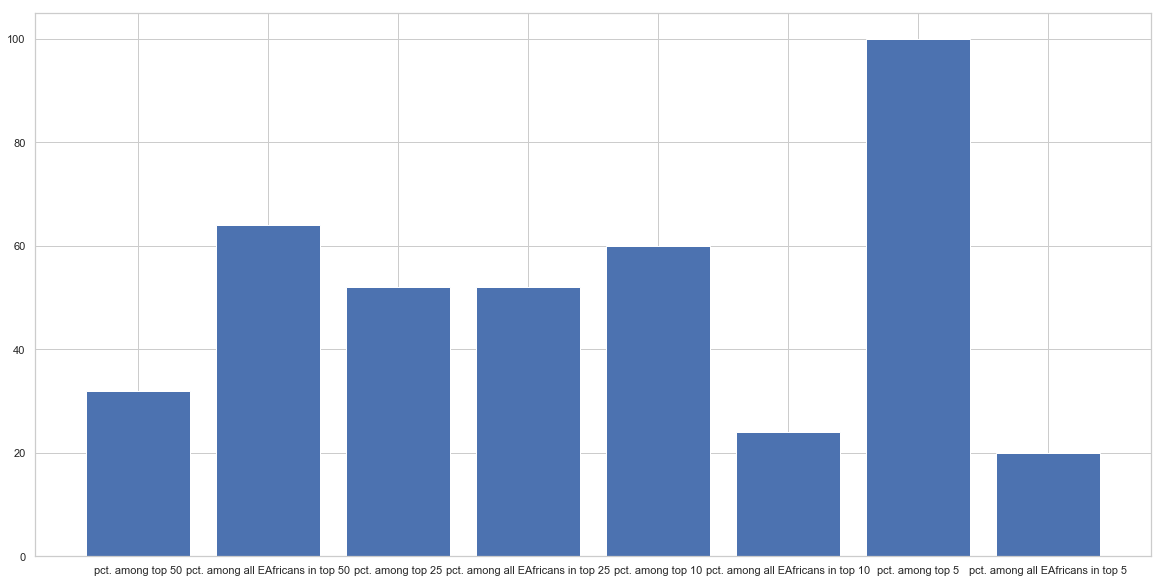

In [49]:
data = {'pct. among top 50': 32, 'pct. among all EAfricans in top 50': 64, 'pct. among top 25': 52, 
        'pct. among all EAfricans in top 25': 52, 
        'pct. among top 10': 60, 'pct. among all EAfricans in top 10': 24, 'pct. among top 5': 100, 
        'pct. among all EAfricans in top 5': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharey=False)
axs.bar(names, values)
#axs[1].scatter(names, values)
#axs[2].plot(names, values)
#fig.suptitle('Categorical Plotting')

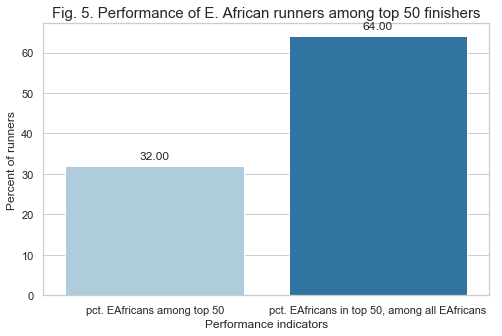

In [70]:
##Checking frequencies for top 25 runners by country  -- Seaborn plot (includes value labels)

data1 = {'pct. EAfricans among top 50': 32, 'pct. EAfricans in top 50, among all EAfricans': 64}

names = list(data1.keys())
values = list(data1.values())

#runner_count = runner_count[:40,]
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))

splot = sns.barplot(names, values, palette ="Paired", alpha=1.0)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Fig. 5. Performance of E. African runners among top 50 finishers', fontsize=15)
plt.ylabel('Percent of runners', fontsize=12)
plt.xlabel('Performance indicators', fontsize=12)
plt.show()

In [ ]:
data2 = {'pct. EAfricans among top 25': 52, 'pct. EAfricans in top 25, among all EAfricans': 52}

names = list(data2.keys())
values = list(data2.values())

#runner_count = runner_count[:40,]
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

splot = sns.barplot(names, values, palette ="vlag", alpha=1.0)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Performance of E. African runners in top 25', fontsize=15)
plt.ylabel('Percent of runners', fontsize=12)
plt.xlabel('Performance indicators', fontsize=12)
plt.show()

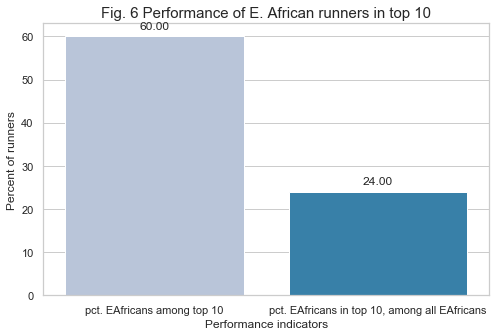

In [62]:
data3 = {'pct. EAfricans among top 10': 60, 'pct. EAfricans in top 10, among all EAfricans': 24}

names = list(data3.keys())
values = list(data3.values())

#runner_count = runner_count[:40,]
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))

splot = sns.barplot(names, values, palette ="PuBu", alpha=1.0)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Fig. 6 Performance of E. African runners in top 10', fontsize=15)
plt.ylabel('Percent of runners', fontsize=12)
plt.xlabel('Performance indicators', fontsize=12)
plt.show()

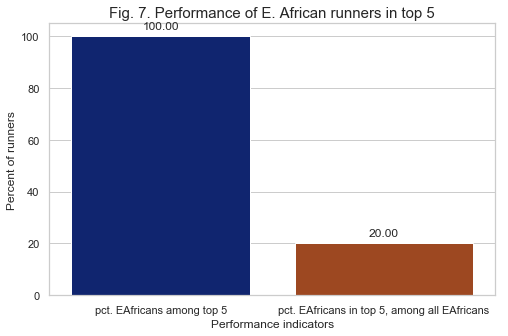

In [55]:
data4 = {'pct. EAfricans among top 5': 100, 'pct. EAfricans in top 5, among all EAfricans': 20}


names = list(data4.keys())
values = list(data4.values())

#runner_count = runner_count[:40,]
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))

splot = sns.barplot(names, values, palette ="dark", alpha=1.0)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Fig. 7. Performance of E. African runners in top 5', fontsize=15)
plt.ylabel('Percent of runners', fontsize=12)
plt.xlabel('Performance indicators', fontsize=12)
plt.show()

In [84]:
##Work with time data
#recode the multiple time variables to a single duration variable in hours
##first covert all hours and minutes to seconds

list(runners.columns)

runners['hrs2sec'] = runners.hours * 3600
runners['min2sec'] = runners.minutes * 60
runners['totsec'] = runners.seconds + runners.min2sec + runners.hrs2sec
runners['duration'] = runners.totsec/3600

list(runners.columns)
runners.head()

,name,country,age,sex,runner_Id,hours,minutes,seconds,place,east_africa,...,ken,uga,sex_dummy,male,female,eastafdum,hrs2sec,min2sec,totsec,duration
0,Lelisa Desisa,ETH,28,M,3,2,5,59,1.0,EAF,...,0,0,0,1,0,1,7200,300,7559,2.099722
1,Shura Kitata,ETH,22,M,2,2,6,1,2.0,EAF,...,0,0,0,1,0,1,7200,360,7561,2.100278
2,Geoffrey Kamworor,KEN,25,M,1,2,6,26,3.0,EAF,...,1,0,0,1,0,1,7200,360,7586,2.107222
3,Tamirat Tola,ETH,27,M,4,2,8,30,4.0,EAF,...,0,0,0,1,0,1,7200,480,7710,2.141667
4,Daniel Wanjiru,KEN,26,M,5,2,10,21,5.0,EAF,...,1,0,0,1,0,1,7200,600,7821,2.172500


In [85]:
##Obtain average duration for the top 2600 runners
meandur = runners['duration'].mean()
mediandur = runners['duration'].median()
meandur
mediandur

3.025

In [86]:
##Obtain average duration for men and women runners in top 2600. 

meandurSex = runners.groupby(['sex'])[['duration']].agg(np.mean)
mediandurSex = runners.groupby(['sex'])[['duration']].agg(np.median)
meandurSex
mediandurSex

,duration
sex,
F,3.096667
M,3.009444


Text(0.5, 0, 'Sex')

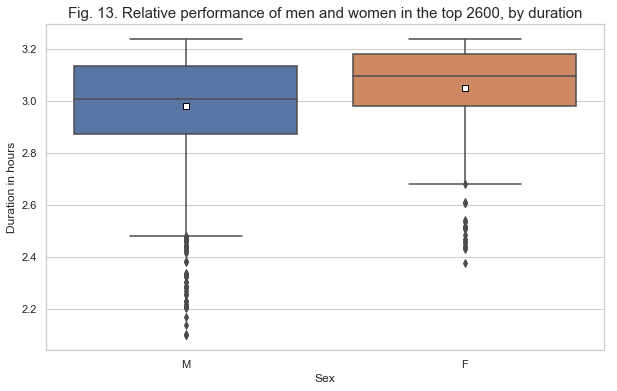

In [87]:
##Create a box plot to show the difference in duration for men and women.

#plt.figure(figsize=(20,10))
plt.figure(figsize=(10,6))
plt.title('Fig. 13. Relative performance of men and women in the top 2600, by duration', fontsize=15)

sns.set_style("whitegrid")   
sns.boxplot(x = 'sex', y = 'duration', data = runners, showmeans=True, 
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.ylabel('Duration in hours', fontsize=12)
plt.xlabel('Sex', fontsize=12)

In [88]:
##Obtain average duration for East African runners vs. others in top 2600. 

meandurEAF = runners.groupby(['east_africa'])[['duration']].agg(np.mean)
mediandurEAF = runners.groupby(['east_africa'])[['duration']].agg(np.median)
meandurEAF
mediandurEAF

,duration
east_africa,
Oth,3.027222
EAF,2.337778


Text(0.5, 0, 'Country')

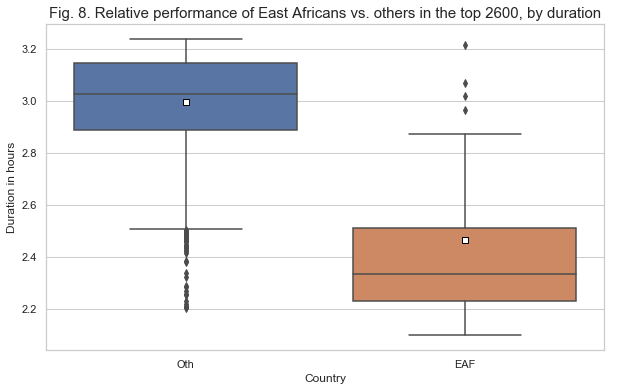

In [90]:
##Box plot for average duration of East African runners vs. other countries.

#plt.figure(figsize=(20,10))
plt.figure(figsize=(10,6))
plt.title('Fig. 8. Relative performance of East Africans vs. others in the top 2600, by duration', fontsize=15)

#plt.ylabel('Duration in hours', fontsize=16)
#plt.xlabel('Country', fontsize=16)

sns.set_style("whitegrid")   
sns.boxplot(x = 'east_africa', y = 'duration', data = runners, showmeans=True, 
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})

plt.ylabel('Duration in hours', fontsize=12)
plt.xlabel('Country', fontsize=12)

In [ ]:
list(runners.columns)

In [ ]:
##Obtain proportions for number of women among top 50, 25, 10, 5 place finishers.

totwom = runners['sex_dummy'].sum()
totwom

tot50wom = runner50['sex_dummy'].sum()
tot25wom = runner25['sex_dummy'].sum()
tot10wom = runner10['sex_dummy'].sum()
tot5wom  =  runner5['sex_dummy'].sum()

#Proportion of east african runners in top 50 out of 50 and of all east African runners:
propw50 = (tot50wom/50)*100
prop50wom = (tot50wom/totwom)*100

##proportion east african runners in top 25
propw25= (tot25wom/25)*100
prop25wom=(tot25wom/totwom)*100


##proportion east african runners in top 10
propw10= (tot10wom/10)*100
prop10wom=(tot10wom/totwom)*100

##proportion east african runners in top 5
propw5= (tot5wom/5)*100
prop5wom=(tot5wom/totwom)*100

In [ ]:
propw50

In [ ]:
prop50wom

In [ ]:
propw25

In [ ]:
prop25wom

In [ ]:
tot50wom

In [ ]:
tot25wom
tot10wom
tot5wom

In [ ]:
##Make a histogram of the duration variable

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.distplot(

    runners['duration'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}

).set(xlabel='Duration in hours', ylabel='Count');

In [ ]:
##duration histogram with KDE ie estimated PDF curve.
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.distplot(

    runners['duration'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}

).set(xlabel='Duration in hours', ylabel='Count');